In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def setInsertParse(file):
    df = pd.DataFrame()

    with open(file, "r") as f:
        f.readline() # skip first line
        for line in f.readlines():
            insertCnt = int(line.split(":")[0])
            info = line.strip().replace(")", "").split("(")[1:]
            microseconds = 0
            numDups = 0
            numCollisions = 0
            for i in info:
                isplit = i.split(",")
                microseconds += int(isplit[0])
                numDups += int(isplit[1])
                numCollisions += int(isplit[2])
            
            df = pd.concat([
                df,
                pd.DataFrame.from_dict({
                    "insertCnt": [insertCnt],
                    "microseconds": [microseconds/len(info)],
                    "milliseconds": [microseconds/len(info)/1000],
                    "numDups": [numDups/len(info)],
                    "numCollisions": [numCollisions/len(info)]})
            ], ignore_index=True);

    return df

In [3]:
dfInserNDLin = setInsertParse("benchmark_set_insert_nodups_linear.txt")
dfInserNDQuad = setInsertParse("benchmark_set_insert_nodups_quad.txt")
dfInserNDDouble = setInsertParse("benchmark_set_insert_nodups_doublehash.txt")
dfInserNDQuadReserve = setInsertParse("benchmark_set_insert_nodups_quad_reserve.txt")

dfInserDLin = setInsertParse("benchmark_set_insert_dups_linear.txt")
dfInserDQuad = setInsertParse("benchmark_set_insert_dups_quad.txt")
dfInserDDouble = setInsertParse("benchmark_set_insert_dups_doublehash.txt")

In [4]:
def calcPercs(df):
    df["dupPerc"] = df["numDups"] / df["insertCnt"]
    df["collPerc"] = df["numCollisions"] / df["insertCnt"]


calcPercs(dfInserNDLin)
calcPercs(dfInserNDQuad)
calcPercs(dfInserNDDouble)

calcPercs(dfInserDLin)
calcPercs(dfInserDQuad)
calcPercs(dfInserDDouble)

In [5]:
def linha(dfs, title, types):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title(title)
    ax.set(xlabel="number of inserts")

    df = pd.DataFrame()
    for i in range(len(dfs)):
        df2 = pd.DataFrame([dfs[i]["insertCnt"], dfs[i]["microseconds"], dfs[i]["milliseconds"]]).transpose()
        df2["type"] = types[i]
        df = pd.concat([df, df2]).reset_index(drop=True)
    
    sb.lineplot(data=df, x="insertCnt", y="milliseconds", hue="type", ax=ax);
    
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

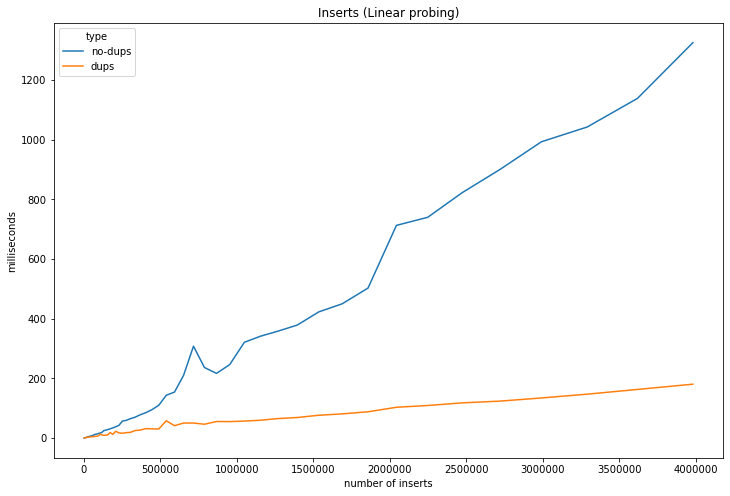

In [6]:
linha([dfInserNDLin, dfInserDLin], "Inserts (Linear probing)", ["no-dups", "dups"])

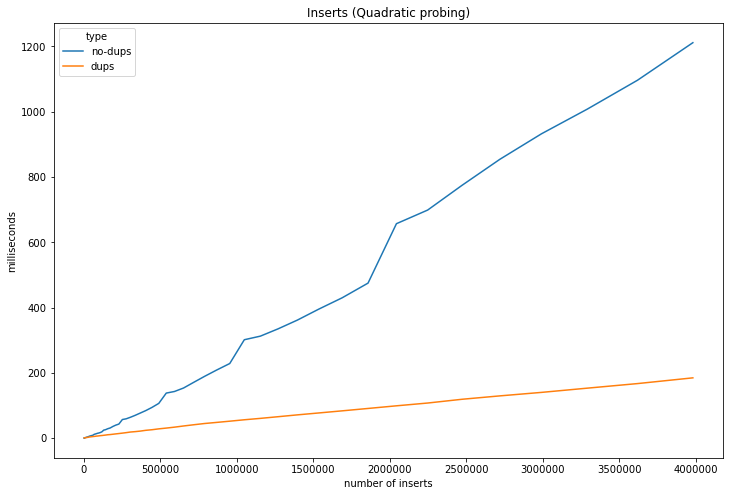

In [7]:
linha([dfInserNDQuad, dfInserDQuad], "Inserts (Quadratic probing)", ["no-dups", "dups"])

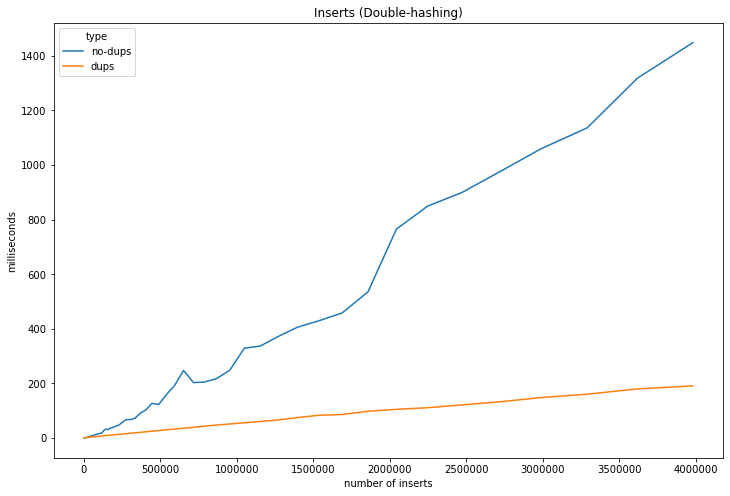

In [8]:
linha([dfInserNDDouble, dfInserDDouble], "Inserts (Double-hashing)", ["no-dups", "dups"])

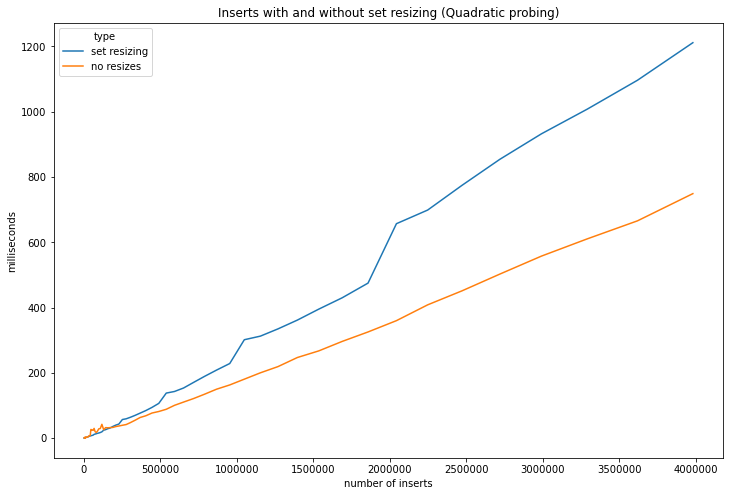

In [9]:
linha([dfInserNDQuad, dfInserNDQuadReserve], "Inserts with and without set resizing (Quadratic probing)", ["set resizing", "no resizes"])

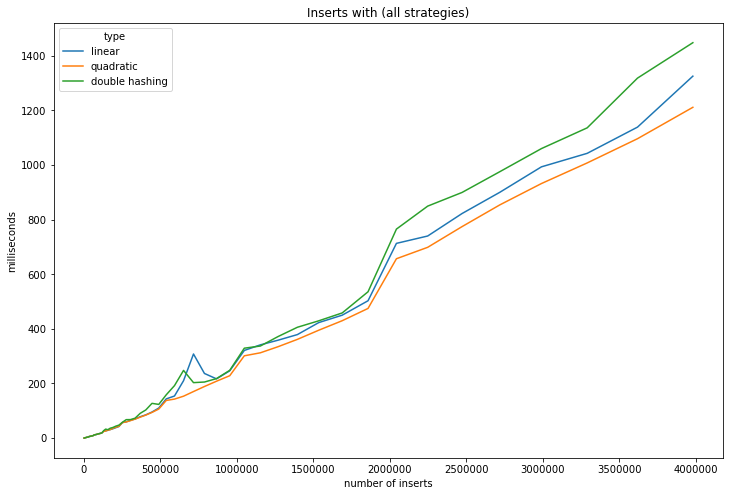

In [10]:
linha([dfInserNDLin, dfInserNDQuad, dfInserNDDouble], "Inserts with (all strategies)", ["linear", "quadratic", "double hashing"])

In [11]:
dfInserDLin.describe()

,insertCnt,microseconds,milliseconds,numDups,numCollisions,dupPerc,collPerc
count,8.800000e+01,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000
mean,4.975486e+05,26772.475000,26.772475,4.789142e+05,2.094577e+05,0.577908,1.280520
std,8.940689e+05,41483.148377,41.483148,8.859738e+05,2.749281e+05,0.365788,0.743034
min,1.000000e+03,124.600000,0.124600,2.880000e+01,2.532200e+03,0.028545,0.259449
25%,7.939500e+03,873.650000,0.873650,1.483550e+03,1.534850e+04,0.186545,0.628152
50%,6.309000e+04,5029.100000,5.029100,4.275000e+04,6.943630e+04,0.677062,1.102076
75%,5.013130e+05,34181.700000,34.181700,4.718188e+05,3.148543e+05,0.941078,2.055680
max,3.981265e+06,180651.800000,180.651800,3.945039e+06,1.032934e+06,0.990901,2.686600


In [12]:
dfInserDQuad.describe()

,insertCnt,microseconds,milliseconds,numDups,numCollisions,dupPerc,collPerc
count,8.800000e+01,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000
mean,4.975486e+05,25470.711364,25.470711,4.789142e+05,2.689772e+05,0.577908,1.418839
std,8.940689e+05,42116.187973,42.116188,8.859738e+05,3.832072e+05,0.365788,1.651207
min,1.000000e+03,135.000000,0.135000,2.880000e+01,2.223200e+03,0.028545,0.382894
25%,7.939500e+03,828.550000,0.828550,1.483550e+03,1.587880e+04,0.186545,0.760303
50%,6.309000e+04,4898.100000,4.898100,4.275000e+04,6.801240e+04,0.677062,1.121239
75%,5.013130e+05,28836.700000,28.836700,4.718188e+05,3.779899e+05,0.941078,1.802350
max,3.981265e+06,184536.800000,184.536800,3.945039e+06,1.524404e+06,0.990901,15.264400


In [13]:
dfInserDDouble.describe()

,insertCnt,microseconds,milliseconds,numDups,numCollisions,dupPerc,collPerc
count,8.800000e+01,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000
mean,4.975486e+05,26129.261364,26.129261,4.789142e+05,2.010033e+05,0.577908,0.898870
std,8.940689e+05,44175.431482,44.175431,8.859738e+05,3.028060e+05,0.365788,0.436806
min,1.000000e+03,111.000000,0.111000,2.880000e+01,1.615800e+03,0.028545,0.317250
25%,7.939500e+03,783.700000,0.783700,1.483550e+03,1.051370e+04,0.186545,0.515732
50%,6.309000e+04,4754.000000,4.754000,4.275000e+04,4.857880e+04,0.677062,0.770746
75%,5.013130e+05,28160.350000,28.160350,4.718188e+05,2.585306e+05,0.941078,1.347358
max,3.981265e+06,190961.600000,190.961600,3.945039e+06,1.263058e+06,0.990901,1.636975


[Text(0.5, 0, '')]

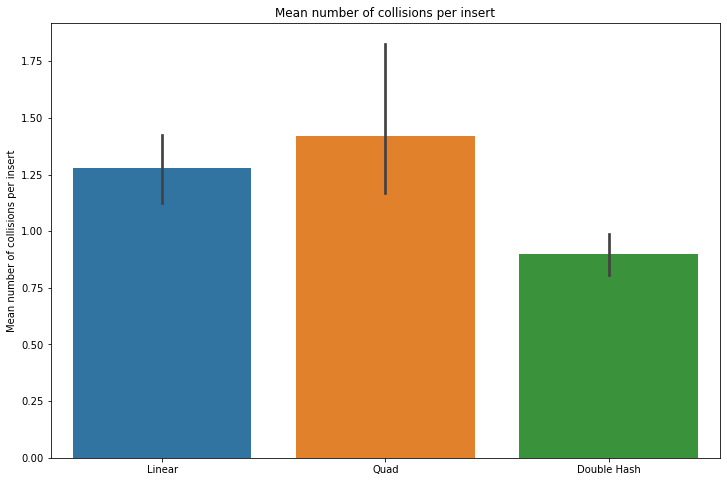

In [14]:
df = pd.DataFrame()

dfs = [dfInserDLin, dfInserDQuad, dfInserDDouble]
types = ["Linear", "Quad", "Double Hash"]
for i in range(len(dfs)):
    df2 = pd.DataFrame([dfs[i]["collPerc"]]).transpose()
    df2["type"] = types[i]
    df = pd.concat([df, df2]).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))
sb.barplot(data=df, x="type", y="collPerc", ax=ax);
ax.set_title("Mean number of collisions per insert")
ax.set(ylabel="Mean number of collisions per insert")
ax.set(xlabel="")

In [15]:
def importBenchmarkMerge(file1, type1, file2, type2):
    dfmerge = pd.DataFrame()

    with open(file1, "r") as f:
        f.readline() # skip first line
        for line in f.readlines():
            setSize = int(line.split(":")[0])
            info = line.split(":")[1].strip().split(" ")
            microseconds = 0
            for i in info:
                microseconds += int(i)
            dfmerge = pd.concat([
                    dfmerge,
                    pd.DataFrame.from_dict({
                        "setSize": [setSize],
                        "microseconds": [microseconds/len(info)],
                        "milliseconds": [microseconds/len(info)/1000],
                        "type": type1,
                    })], ignore_index=True);
    
    with open(file2, "r") as f:
        f.readline() # skip first line
        for line in f.readlines():
            setSize = int(line.split(":")[0])
            info = line.split(":")[1].strip().split(" ")
            microseconds = 0
            for i in info:
                microseconds += int(i)
            dfmerge = pd.concat([
                    dfmerge,
                    pd.DataFrame.from_dict({
                        "setSize": [setSize],
                        "microseconds": [microseconds/len(info)],
                        "milliseconds": [microseconds/len(info)/1000],
                        "type": type2,
                    })], ignore_index=True);
    
    return dfmerge


dfmerge = importBenchmarkMerge("benchmark_set_merge.txt", "no-resize", "benchmark_set_merge_resize.txt", "resize")
dfmergesdups = importBenchmarkMerge("benchmark_set_merge_dups.txt", "no-resize", "benchmark_set_merge_dups_resize.txt", "resize")

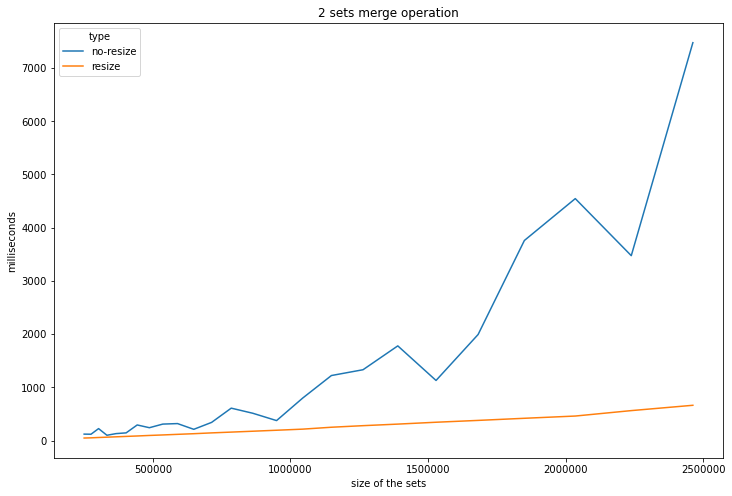

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("2 sets merge operation")
ax.set(xlabel="size of the sets")

sb.lineplot(data=dfmerge, x="setSize", y="milliseconds", hue="type", ax=ax);

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

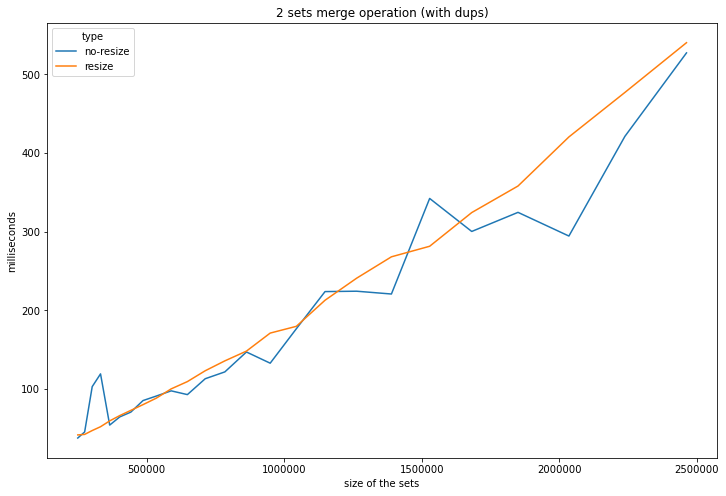

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("2 sets merge operation (with dups)")
ax.set(xlabel="size of the sets")

sb.lineplot(data=dfmergesdups, x="setSize", y="milliseconds", hue="type", ax=ax);

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

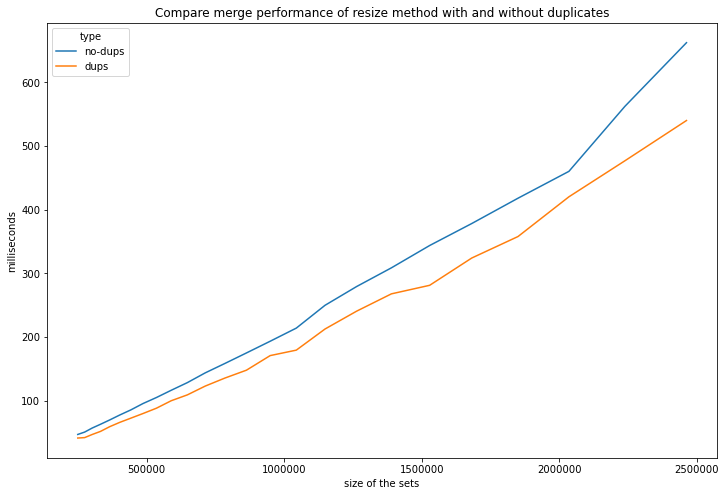

In [18]:
dfmergeresizecmp = importBenchmarkMerge("benchmark_set_merge_resize.txt", "no-dups", "benchmark_set_merge_dups_resize.txt", "dups")
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Compare merge performance of resize method with and without duplicates")
ax.set(xlabel="size of the sets")

sb.lineplot(data=dfmergeresizecmp, x="setSize", y="milliseconds", hue="type", ax=ax);

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

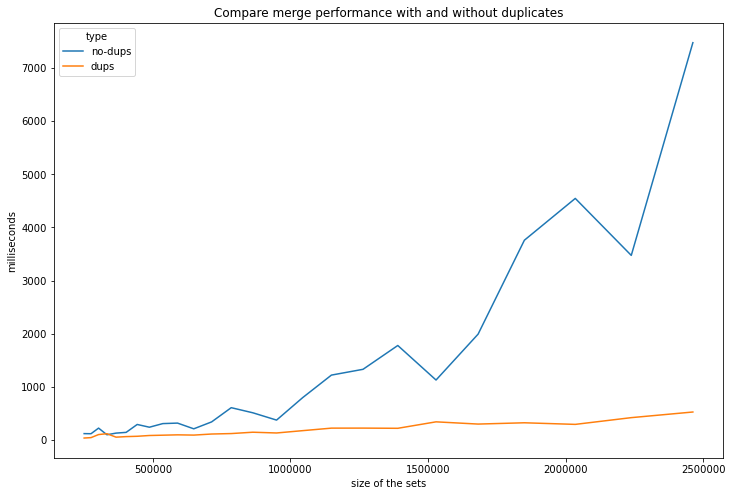

In [19]:
dfmergenoresizecmp = importBenchmarkMerge("benchmark_set_merge.txt", "no-dups", "benchmark_set_merge_dups.txt", "dups")
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Compare merge performance with and without duplicates")
ax.set(xlabel="size of the sets")

sb.lineplot(data=dfmergenoresizecmp, x="setSize", y="milliseconds", hue="type", ax=ax);

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')